In [23]:
# Step 1: Import necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import product
from datetime import datetime

In [24]:
# Load data from CSV file
data_rh = pd.read_csv('../Dataset/colombo_rh_2012-2018.csv')
data_t = pd.read_csv('../Dataset/colombo_t_2012-2018.csv')

In [25]:
data_rh.head()

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [26]:
data_t.head()

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,TMPMAX,2012,1,1,30.1
1,43466,COLOMBO,TMPMAX,2012,1,2,30.7
2,43466,COLOMBO,TMPMAX,2012,1,3,31.6
3,43466,COLOMBO,TMPMAX,2012,1,4,30.4
4,43466,COLOMBO,TMPMAX,2012,1,5,32.3


In [27]:
df_rh = data_rh.rename(columns={'obs_val': 'rh_val'})
df_t =  data_t.rename(columns={'obs_val': 't_val'})

In [28]:
df_rh.head()

,station_id,station_name,element_name,year,month,day,rh_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [29]:
df_t.head()

,station_id,station_name,element_name,year,month,day,t_val
0,43466,COLOMBO,TMPMAX,2012,1,1,30.1
1,43466,COLOMBO,TMPMAX,2012,1,2,30.7
2,43466,COLOMBO,TMPMAX,2012,1,3,31.6
3,43466,COLOMBO,TMPMAX,2012,1,4,30.4
4,43466,COLOMBO,TMPMAX,2012,1,5,32.3


In [30]:
df_combined = pd.merge(df_rh, df_t, on=['station_id', 'station_name', 'year', 'month', 'day'])

# Drop unnecessary columns
df_combined.drop(['station_id','station_name','element_name_x','element_name_y'], axis=1, inplace=True)

In [31]:
df_combined.head()

,year,month,day,rh_val,t_val
0,2012,1,1,91.0,30.1
1,2012,1,2,90.0,30.7
2,2012,1,3,89.0,31.6
3,2012,1,4,89.0,30.4
4,2012,1,5,95.0,32.3


In [32]:
df_combined['t_val_fahrenheit'] = (df_combined['t_val'] * 9/5) + 32


In [33]:
df_combined.head()

,year,month,day,rh_val,t_val,t_val_fahrenheit
0,2012,1,1,91.0,30.1,86.18
1,2012,1,2,90.0,30.7,87.26
2,2012,1,3,89.0,31.6,88.88
3,2012,1,4,89.0,30.4,86.72
4,2012,1,5,95.0,32.3,90.14


In [34]:
df_combined['HI'] = (-42.379 +
            2.04901523 * df_combined['t_val_fahrenheit'] +
            10.14333127 * df_combined['rh_val'] -
            0.22475541 * df_combined['t_val_fahrenheit'] * df_combined['rh_val'] -
            0.00683783 * df_combined['t_val_fahrenheit'] * df_combined['t_val_fahrenheit'] -
            0.05481717 * df_combined['rh_val'] * df_combined['rh_val'] +
            0.00122874 * df_combined['t_val_fahrenheit'] * df_combined['t_val_fahrenheit'] * df_combined['rh_val'] +
            0.00085282 * df_combined['t_val_fahrenheit'] * df_combined['rh_val'] * df_combined['rh_val'] -
            0.00000199 * df_combined['t_val_fahrenheit'] * df_combined['t_val_fahrenheit'] * df_combined['rh_val'] * df_combined['rh_val'])

In [35]:
df_combined.head()

,year,month,day,rh_val,t_val,t_val_fahrenheit,HI
0,2012,1,1,91.0,30.1,86.18,106.586916
1,2012,1,2,90.0,30.7,87.26,110.222986
2,2012,1,3,89.0,31.6,88.88,116.153191
3,2012,1,4,89.0,30.4,86.72,107.436420
4,2012,1,5,95.0,32.3,90.14,127.316863


In [36]:
df_combined.tail()

,year,month,day,rh_val,t_val,t_val_fahrenheit,HI
6590,2018,12,27,90.0,31.4,88.52,115.429849
6591,2018,12,28,88.0,30.2,86.36,105.458493
6592,2018,12,29,76.0,31.4,88.52,105.355222
6593,2018,12,30,81.0,32.8,91.04,118.144937
6594,2018,12,31,82.0,31.4,88.52,109.429020


In [37]:
df_combined.HI.describe()

count    6569.000000
mean       98.994258
std        15.070453
min        65.917823
25%        84.220898
50%       102.842606
75%       110.179440
max       140.169659
Name: HI, dtype: float64

In [38]:
print('Shape of dataset',df_combined.shape)

Shape of dataset (6595, 7)


In [39]:
# Pivot the DataFrame
data = df_combined.pivot_table(index=['year', 'month', 'day'], values='HI', aggfunc='mean')

# Reset the index
data.reset_index(inplace=True)

In [42]:
data.head(10)

,year,month,day,HI
0,2012,1,1,106.586916
1,2012,1,2,110.222986
2,2012,1,3,116.153191
3,2012,1,4,107.436420
4,2012,1,5,127.316863
5,2012,1,6,132.450317
6,2012,1,7,116.979562
7,2012,1,8,113.698024
8,2012,1,9,116.858376
9,2012,1,10,106.366459


In [43]:
# Create a new DataFrame with average relative humidity values
data = data[['year', 'month', 'day', 'HI']]
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)
data.drop(['year', 'month', 'day'], axis=1, inplace=True)
data=data.dropna()

In [47]:
data.head

<bound method NDFrame.head of                     HI
date                  
2012-01-01  106.586916
2012-01-02  110.222986
2012-01-03  116.153191
2012-01-04  107.436420
2012-01-05  127.316863
...                ...
2018-12-27  112.071640
2018-12-28  102.758572
2018-12-29  103.734345
2018-12-30  111.847686
2018-12-31  106.262844

[2557 rows x 1 columns]>

In [48]:
data.tail

<bound method NDFrame.tail of                     HI
date                  
2012-01-01  106.586916
2012-01-02  110.222986
2012-01-03  116.153191
2012-01-04  107.436420
2012-01-05  127.316863
...                ...
2018-12-27  112.071640
2018-12-28  102.758572
2018-12-29  103.734345
2018-12-30  111.847686
2018-12-31  106.262844

[2557 rows x 1 columns]>

In [51]:
thermosense = pd.DataFrame(data)

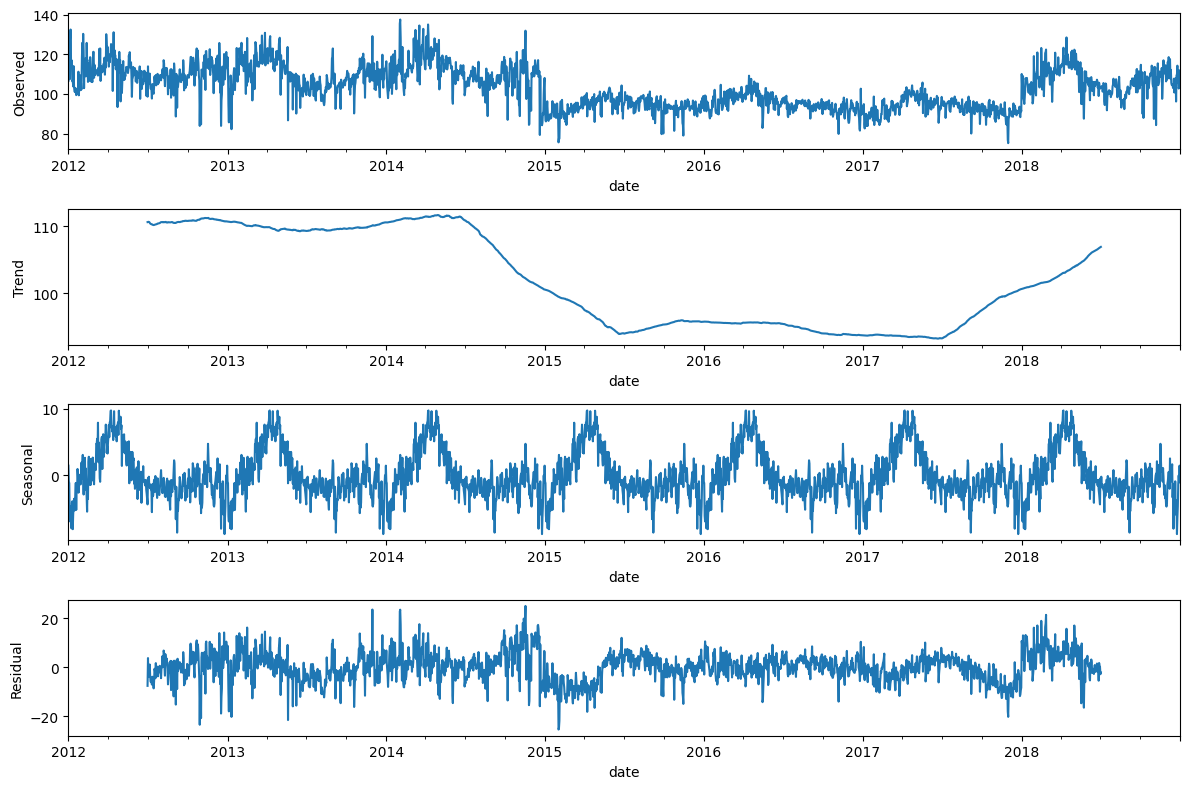

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['HI'], model='additive', period=365)

# Plot the decomposed components
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')
decomposition.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax[2])
ax[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax[3])
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [56]:
from statsmodels.tsa.stattools import adfuller
def adf_test(thermosense):
     dftest = adfuller(thermosense, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(thermosense['HI'])

1. ADF :  -2.558504280449352
2. P-Value :  0.10188039965508017
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 2534
5. Critical Values :
	 1% :  -3.43293324257297
	 5% :  -2.8626812695784225
	 10% :  -2.5673775408540145


**p-value<0.05 so its stationary**

In [57]:
data.to_csv("df_final.csv")

Traning and test Split 

In [58]:
# Split the data into train and test sets
train_percentage = 0.8  # Use 80% of the data for training
train_size = int(len(data) * train_percentage)
train_data = data[:train_size]
test_data = data[train_size:]

**Find best parameter order  for ARIMA MODEL**

In [59]:
# Step 5: Determine the optimal ARIMA parameters using grid search
def optimize_arima(order_list, endog):
    results = []
    for order in order_list:
        try:
            model = ARIMA(endog, order=order).fit()
            results.append((order, model.aic))
        except:
            continue
    return sorted(results, key=lambda x: x[1])

p = q = range(0, 6)
d = range(0, 3)
parameters = product(p, d, q)
order_list = list(parameters)

best_order = optimize_arima(order_list, data)[0][0]
print(best_order)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\st

(4, 1, 5)


In [60]:
!pip install pmdarima

**PARAMAETER CHOOSING FOR SEASONAL ARIMA MODEL USING GRID SEARCH**

In [61]:
from numpy.linalg import LinAlgError

In [62]:
import itertools
import statsmodels.api as sm

# Define the range of p, d, and q values to try for the non-seasonal component
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Define the range of P, D, and Q values to try for the seasonal component
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
s = 12  # Seasonal period

# Create a list of all possible combinations of non-seasonal and seasonal orders
param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))

# Fit and evaluate each model using cross-validation
results = []
for order in param_combinations:
    try:
        # Fit the SARIMA model with the given order
        model = sm.tsa.SARIMAX(data, order=(order[0], order[1], order[2]), 
                               seasonal_order=(order[3], order[4], order[5], s)).fit()
        
        # Evaluate the model using AIC or BIC score
        results.append((order, model.aic))
        
    except (ValueError, LinAlgError) as e:
        # If the model fails to fit, skip this iteration and move on to the next one
        print(f"Error fitting model with order {order}: {e}")
        continue

# Find the best model order with the lowest AIC or BIC score
best_order = sorted(results, key=lambda x: x[1])[0][0]
print(f"The best model order is: {best_order}")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\st

KeyboardInterrupt: 

**Build the model**

**FUTURE 12 MONTH PREDICTION**

In [ ]:
# Fit the ARIMA model
import statsmodels.api as sm
#from statsmodels.tsa.arima.model import ARIMA

model = sm.tsa.SARIMAX(data, order=(2,0,1),seasonality_order=(0,1,1,365)).fit()
#model = ARIMA(data, order=(40,0,9)).fit()
model.summary()

# Evaluate the model performance
predictions = model.predict(start=len(data), end=len(data) + len(data) - 1,typ='levels')
rmse = sqrt(mean_squared_error(data, predictions))
print("RMSE: ", rmse)

c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonality_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword argu

RMSE:  20.970980110775578


                 Date  Predicted Humidity
2024-04-08 2024-04-08           74.986173
2024-04-09 2024-04-09           74.972295
2024-04-10 2024-04-10           74.958419
2024-04-11 2024-04-11           74.944546
2024-04-12 2024-04-12           74.930676
...               ...                 ...
2025-04-03 2025-04-03           70.152370
2025-04-04 2025-04-04           70.139386
2025-04-05 2025-04-05           70.126405
2025-04-06 2025-04-06           70.113426
2025-04-07 2025-04-07           70.100449

[365 rows x 2 columns]


c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


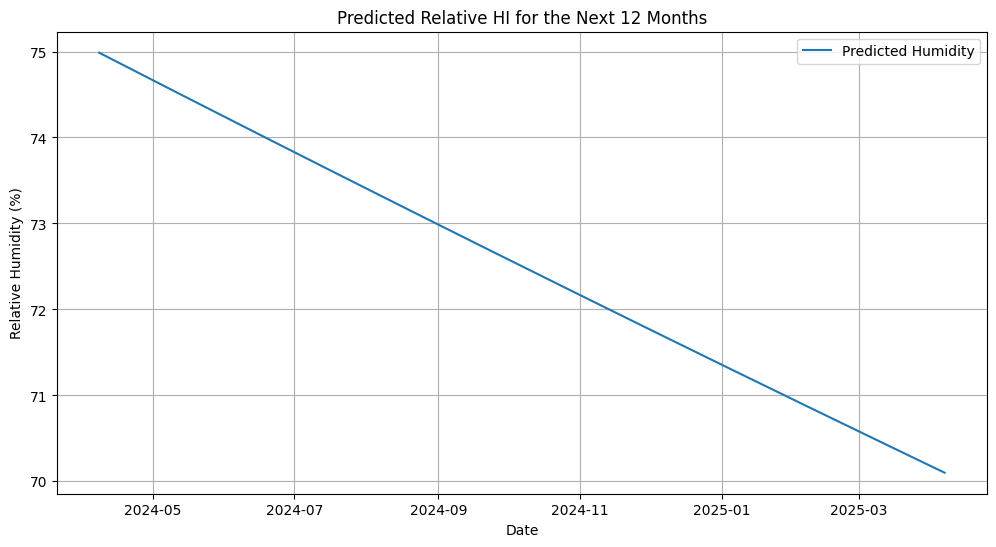

In [ ]:
# Generate the date range for the next 12 months
start_date = '2024-04-08'
end_date = '2025-04-07'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Make predictions using the ARIMA model
future_forecast = model.predict(start=start_date, end=end_date, typ='levels')

# Combine the date range and predictions into a DataFrame
predicted_data_2024 = pd.DataFrame({'Date': date_range, 'Predicted Humidity': future_forecast})

predicted_data_2024.to_csv('predicted_data_future.csv')
print(predicted_data_2024)



# Create a line plot of the predicted humidity values
plt.figure(figsize=(12, 6))
plt.plot(predicted_data_2024['Date'], predicted_data_2024['Predicted Humidity'], label='Predicted Humidity')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.title('Predicted Relative HI for the Next 12 Months')
plt.legend()
plt.grid()
plt.show()